# Plotting PGH Transit Data
#### By Colton Lapp

#### Import modules

In [1]:
#Import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import geopandas as gpd
import shapely
import numpy as np
import os

# Read in data

In [2]:
#Set base directory
base_dir = os.getcwd()

### Read in Route Shape File

In [ ]:
#read in Route shape file
path = base_dir + "/Data/PRT_Routes_current_(2302)/PRT_Routes_current_(2302).shp"
route_shp = gpd.read_file(path)

### Read in Stops CSV File

In [3]:
#Read in stops data
stops = pd.read_csv( base_dir + '/Data/PRT stop data.csv')
stops.sample(3)

clever_id stop_id                                      stop_name  \
57709       2312  W25910  W CARSON ST AT WEST END BRIDGE STEPS (UNDERPA   
89182      22644  N71339                         MT TROY RD AT VILLA DR   
62777       1403  P02490                   LIBERTY AVE AT SMITHFIELD ST   
64050       4838  P03145                    SMITHFIELD ST AT FORBES AVE   
24257       7170  E27420                          HAWKINS AVE AT 4TH ST   

      direction                                         routes_ser  latitude  \
57709  Outbound                   28X, 20, 21, 22, 24, G2, G3, G31   40.4448   
89182   Inbound                                                  4   40.4957   
62777      Both  1, 2, 6, 11, 15, 86, 87, 88, 91, 29, 31, 39, 4...   40.4432   
64050  Outbound  39, 40, 41, 43, 44, 48, 51, 51L, Y1, Y45, Y46,...   40.4396   
24257  Outbound                                            59, 61A   40.4094   

       longitude mode     shelter stop_type  datekey   time_period route_name  \
57709   -80.0288  Bus  No Shelter  Bus Stop   201909  Pre-pandemic         G2   
89182   -80.0007  Bus  No Shelter  Bus Stop   202104      Pandemic          4   
62777   -79.9968  Bus  No Shelter  Bus Stop   201909  Pre-pandemic          6   
64050   -79.9991  Bus  No Shelter  Bus Stop   202001  Pre-pandemic         Y1   
24257   -79.8669  Bus  No Shelter  Bus Stop   202104      Pandemic        61A   

      serviceday  total_ons  total_offs  days    avg_ons   avg_offs  
57709        Sun        6.0         3.0     6   1.000000   0.500000  
89182    Weekday        0.0         0.0    22   0.000000   0.000000  
62777        Sun        0.0        25.0     6   0.000000   4.166667  
64050    Weekday      758.0        14.0    22  34.454550   0.636364  
24257    Weekday       46.0       591.0    22   2.090909  26.863640

### Convert Stops Dataframe into a Geo DataFrame and create geometry out of lat/long data

In [4]:
#Convert stops df to GeoPandas df, adding the latitude and longitude as 
stops_gdf = gpd.GeoDataFrame(
    stops, geometry=gpd.points_from_xy(stops.longitude, stops.latitude))
stops_gdf.sample(2)

clever_id stop_id                      stop_name direction routes_ser  \
1126        1260  N12800     CALIFORNIA AVE AT FISK AVE   Inbound    16, 19L   
54816       8948  E17320  EAST HILLS DR AT PARK HILL DR   Inbound         79   

       latitude  longitude mode     shelter stop_type  datekey time_period  \
1126    40.5032   -80.0725  Bus  No Shelter  Bus Stop   202009    Pandemic   
54816   40.4526   -79.8737  Bus  No Shelter  Bus Stop   202104    Pandemic   

      route_name serviceday  total_ons  total_offs  days  avg_ons  avg_offs  \
1126          16        Sat       18.0         2.0     4      4.5       0.5   
54816         79        Sun        0.0         4.0     4      0.0       1.0   

                         geometry  
1126   POINT (-80.07250 40.50320)  
54816  POINT (-79.87370 40.45260)

# Read in other PGH shapefiles

In [11]:
streets_shp = gpd.read_file(base_dir + '/Data/AlleghenyCounty_StreetCenterlines202304/AlleghenyCounty_StreetCenterlines202304.shp')
hoods_shp =  gpd.read_file(base_dir + '/Data/Neighborhoods_with_SNAP_Data/Neighborhood_SNAP.shp')
parks_shp =  gpd.read_file(base_dir + '/Data/PGHWebParks/PGHWebParks.shp')
city_shp = gpd.read_file(base_dir + '/Data/Pittsburgh_City_Boundary/City_Boundary.shp') 
water_shp = gpd.read_file(base_dir + '/Data/PGH_Watersheds/PGH_Watersheds.shp')  

## Convert Streets and Water CPS

In [116]:
#Convert streets CPS
streets_shp = streets_shp.to_crs(4326)
water_shp = water_shp.to_crs(4326)

## Select certain stops and also certain routes 

In [74]:
#Select certain stop data
Apr2021_stops = stops_gdf[stops_gdf['datekey']==202104]
Apr2021_Sat = Apr2021_stops[ Apr2021_stops['serviceday']=='Sat' ]
Apr2021_Week = Apr2021_stops[ Apr2021_stops['serviceday']=='Weekday' ]

#Select certain routes
route_Sat = route_shp[route_shp['DOW']=='Saturday']

## Which stop data is available?

In [129]:
stops_gdf[['datekey']].value_counts()

datekey
202104     28530
202009     26882
201909     26102
202001     26097
dtype: int64

**Looks like we have stops data for 2019 - 09, 2020-01, 2020-09 and 2021-04**

# Plot Data

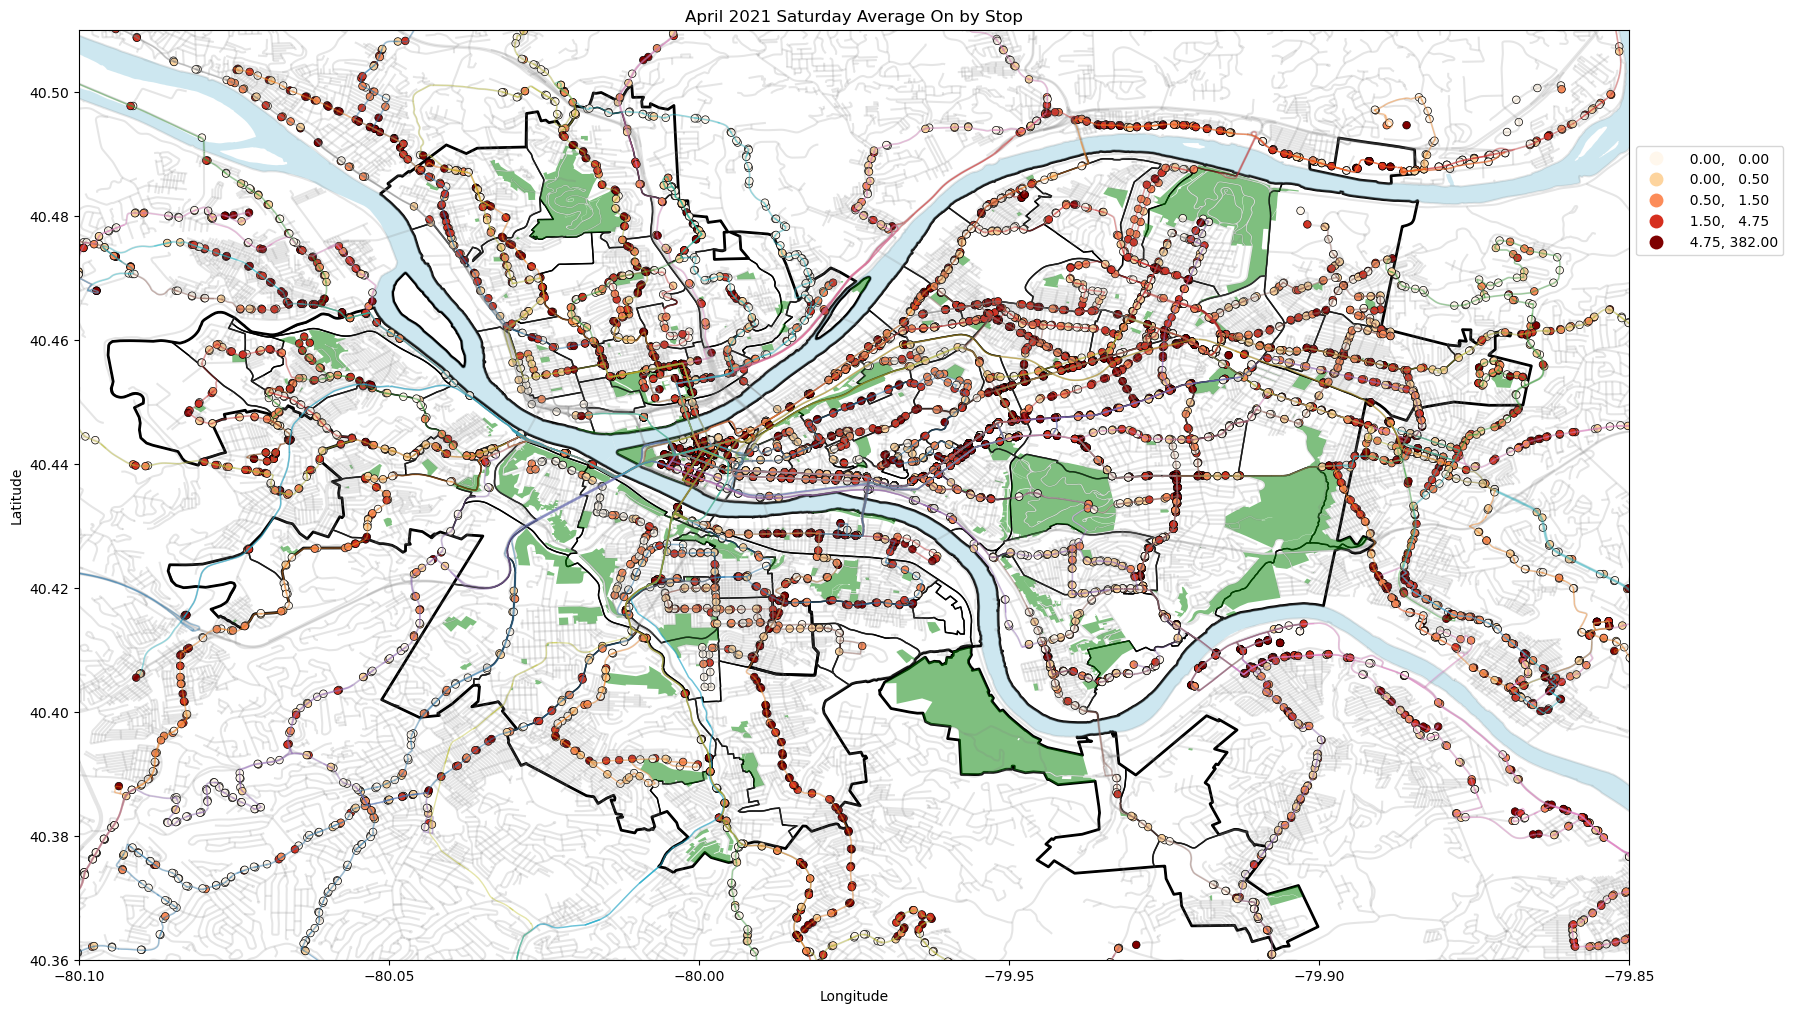

In [118]:
# create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# plot each GeoPandas dataframe on the same axis
city_shp.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=2)
water_shp.plot(ax=ax, facecolor='lightblue', edgecolor='none', alpha=.4)
hoods_shp.plot(ax=ax, facecolor='none', edgecolor='black',  linewidth=1)
parks_shp.plot(ax=ax, color='green', alpha=.5)
streets_shp.plot(ax=ax, color='gray', alpha=0.2)
route_Sat.plot(ax=ax, alpha=.4, linewidth=1, column='Route_Name', categorical=True, legend=True)
Apr2021_Sat.plot(ax=ax, column='avg_ons', cmap='OrRd' , edgecolor='black', linewidth=.5,
                 scheme='quantiles', k=5, markersize=30, alpha=1, legend=True)


# set the title and axis labels
ax.set_title('April 2021 Saturday Average On by Stop')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# show the plot
plt.ylim([40.36, 40.51])
plt.xlim([-80.1, -79.85])

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1,0.75))




plt.show()

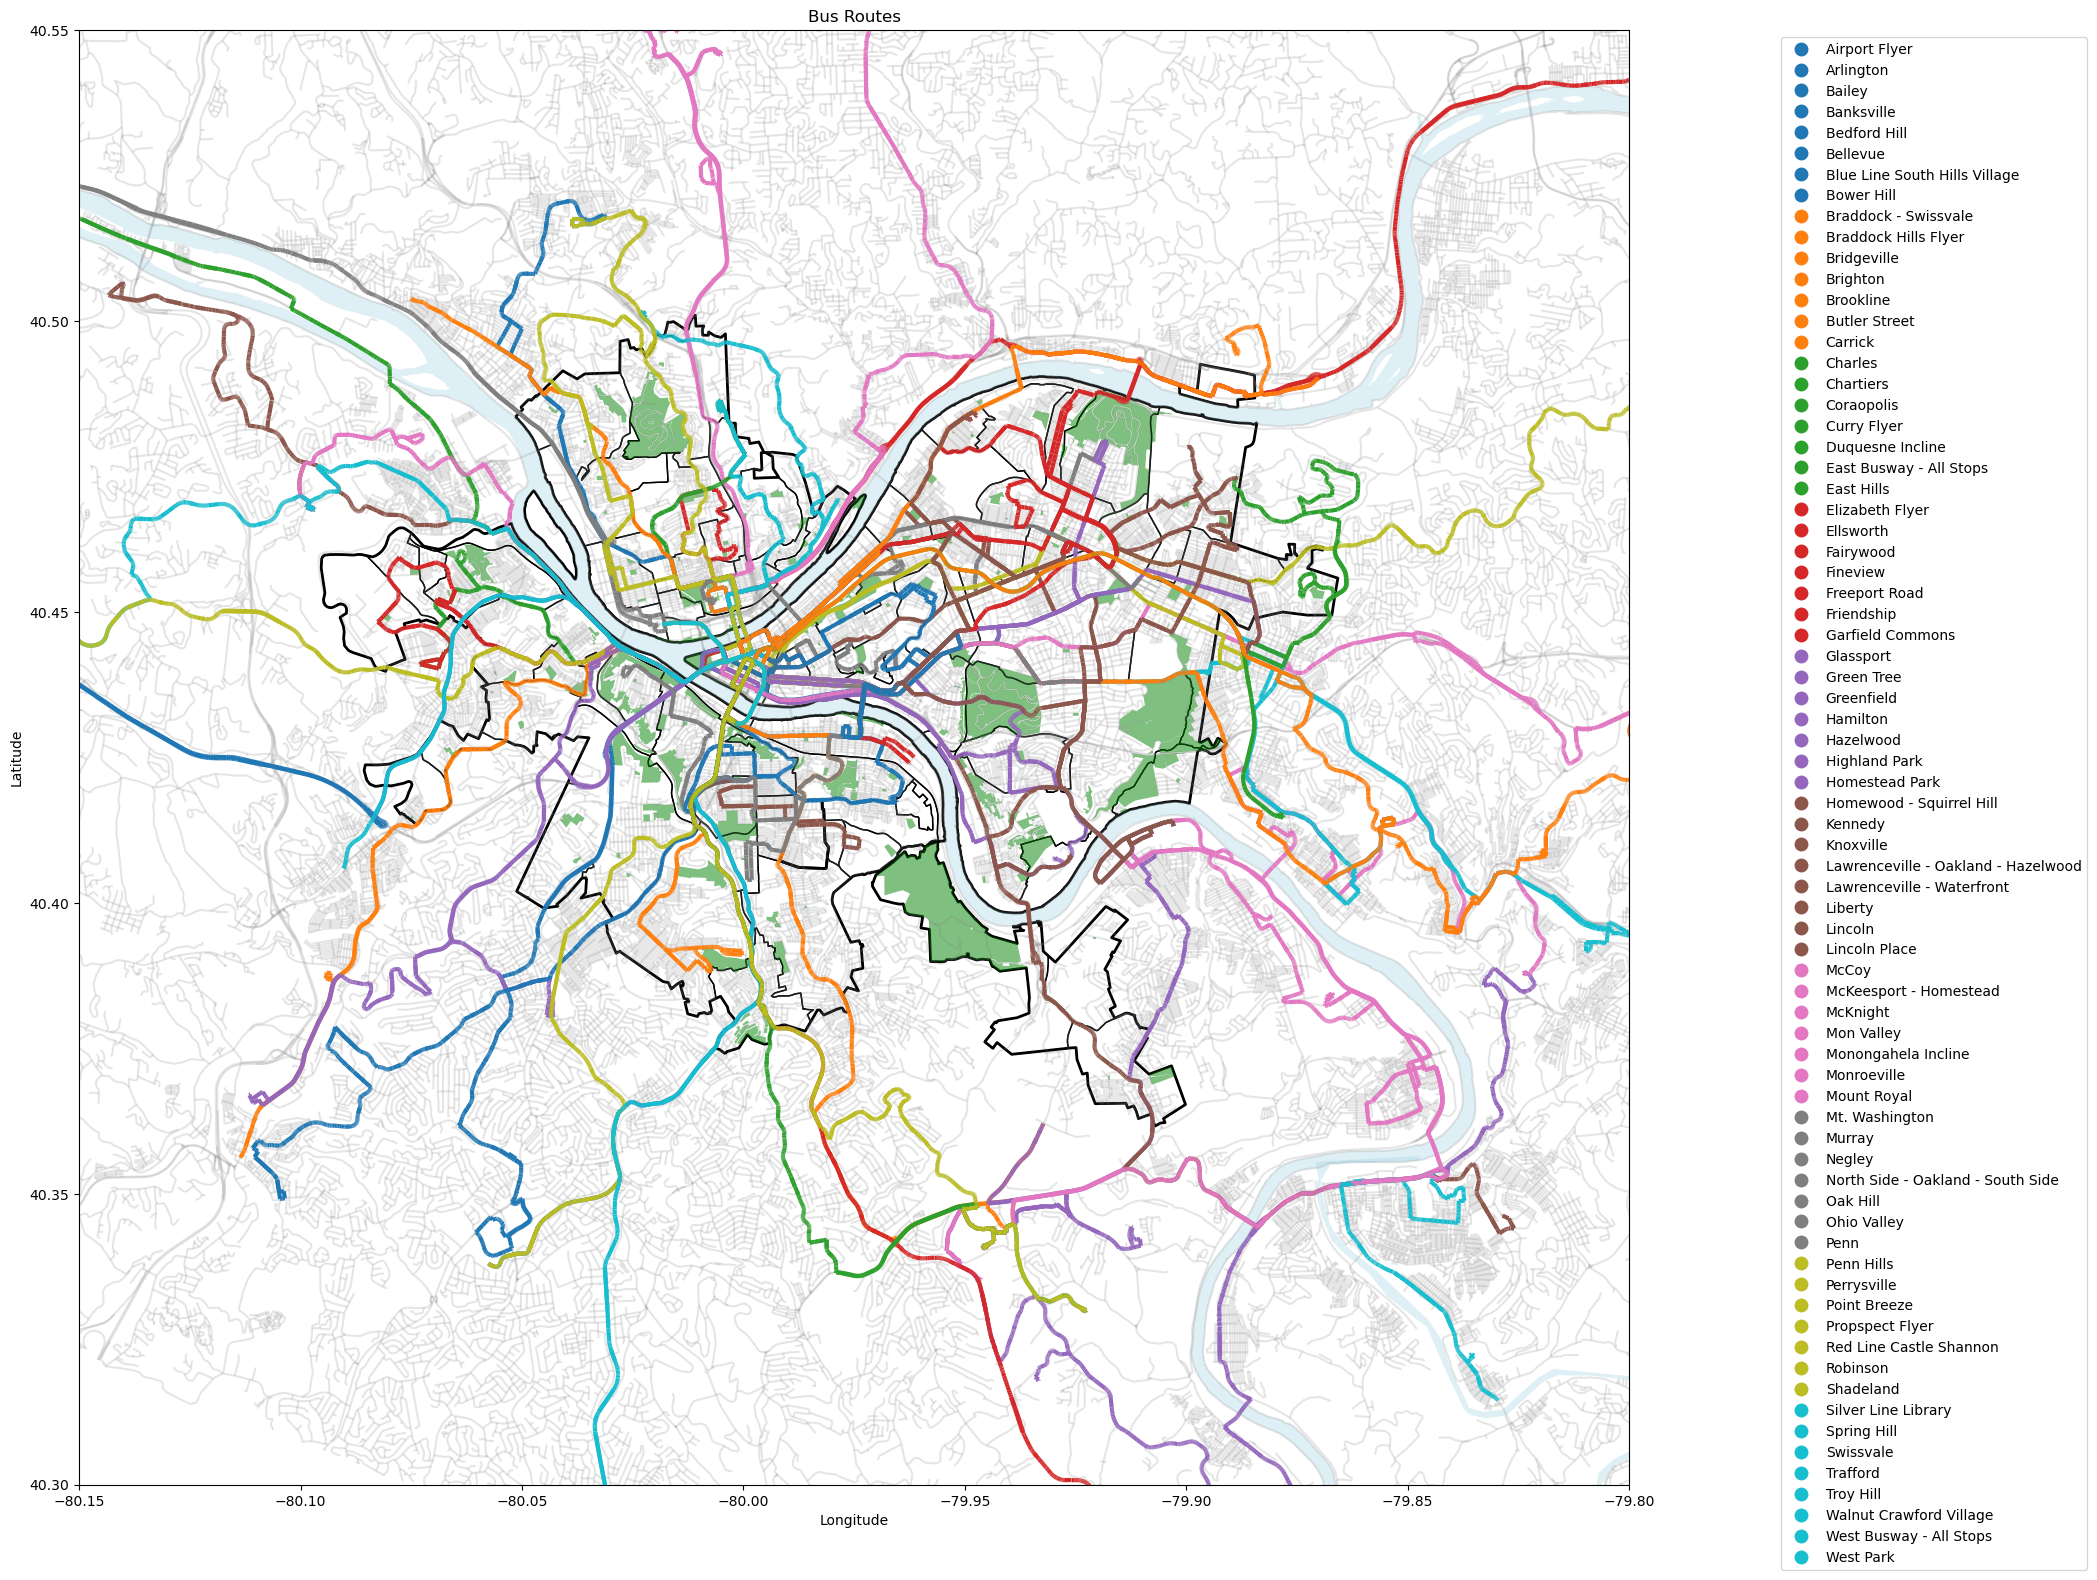

In [122]:
# create a new figure and axis
fig, ax = plt.subplots(figsize=(20, 20))

# plot each GeoPandas dataframe on the same axis
city_shp.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=2)
water_shp.plot(ax=ax, facecolor='lightblue', edgecolor='none', alpha=.4)
hoods_shp.plot(ax=ax, facecolor='none', edgecolor='black',  linewidth=1)
parks_shp.plot(ax=ax, color='green', alpha=.5)
streets_shp.plot(ax=ax, color='gray', alpha=0.2)
route_Sat.plot(ax=ax, alpha=1, linewidth=3, column='Route_Name', categorical=True, legend=True)



# set the title and axis labels
ax.set_title('Bus Routes')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# show the plot
plt.ylim([40.3, 40.55])
plt.xlim([-80.15, -79.8])

# Adjust legend location
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.3,1))




plt.show()